In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Handling Null Values

In [25]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


### Data Visulization

<Axes: ylabel='Density'>

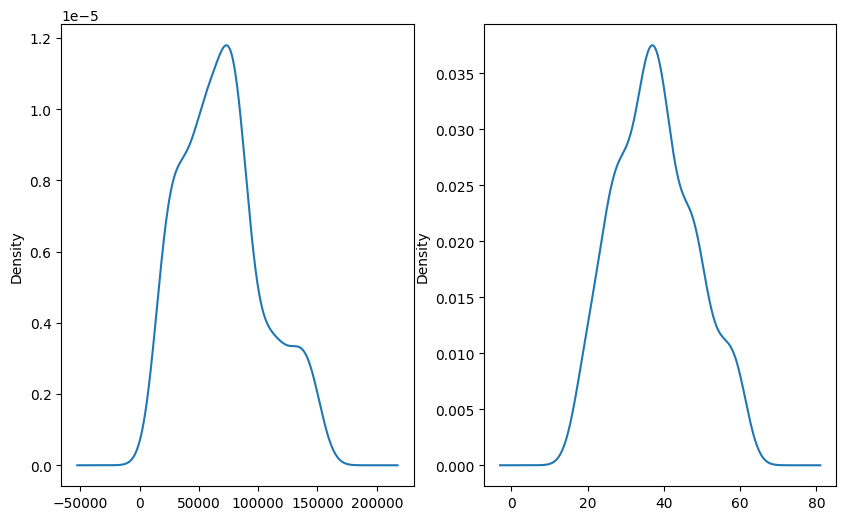

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
df['EstimatedSalary'].plot(kind = 'kde')
plt.subplot(1, 2, 2)
df['Age'].plot(kind = 'kde')

<Axes: ylabel='EstimatedSalary'>

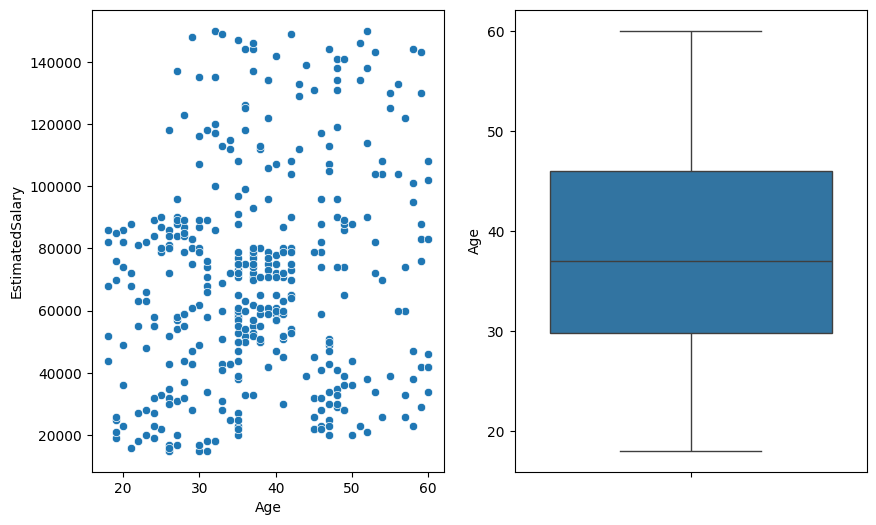

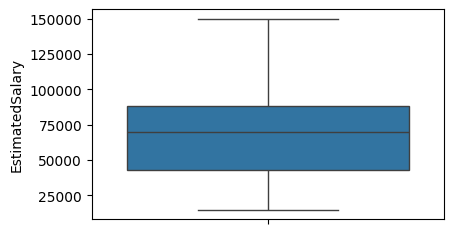

In [27]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'])
plt.subplot(1,2,2)
sns.boxplot(df['Age'])
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.boxplot(df['EstimatedSalary'])

### Preprocessing

In [28]:
num_features = ['Age', 'EstimatedSalary']
cat_features = ['Gender']

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
preprocessor = ColumnTransformer([
    ('std_scaler', StandardScaler(), num_features),
    ('one_hot', OneHotEncoder(), cat_features)
])

In [30]:
X = df.drop(columns = ['Purchased', 'User ID'], axis = 1)
y = df['Purchased']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Logistic Regression

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipe = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [33]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'EstimatedSalary']),
                                                 ('one_hot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('classifier', LogisticRegression())])

In [34]:
ypred = pipe.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, f1_score
print("Confusion Matrix: \n", confusion_matrix(y_test, ypred))
print("F1 Score: ", f1_score(y_test, ypred))

Confusion Matrix: 
 [[50  2]
 [ 7 21]]
F1 Score:  0.8235294117647057


In [36]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [37]:
class LGGD:
  def __init__(self, lr, epochs):
    self.lr = lr
    self.epochs = epochs
    self.coef_ = None
    self.intercept_ = None

  def fit(self, X_train, y_train):

    X_train = np.insert(X_train, 0, 1, axis = 1)
    self.intercept_ = 0
    self.coef_ = np.ones(X_train.shape[1])

    for i in range(self.epochs):
      y_hat = sigmoid(np.dot(X_train,self.coef_))
      self.coef_ = self.coef_ + self.lr*(np.dot((y-y_hat),X_train)/X_train.shape[0])

  def predict(self, X_test):
    return sigmoid(np.dot(X_test, self.coef_))

In [38]:
lggd = LGGD(0.1, 1000)

In [39]:
lggd.fit(X_train, y_train)

TypeError: can't multiply sequence by non-int of type 'float'

### Ploynomial Logistic Regression

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('classifier', LogisticRegression())
])

In [50]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'EstimatedSalary']),
                                                 ('one_hot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('poly', PolynomialFeatures()),
                ('classifier', LogisticRegression())])

In [51]:
y_pred1 = pipe.predict(X_test)

In [53]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred1))
print("F1 Score: ", f1_score(y_test, y_pred1))

Confusion Matrix: 
 [[48  4]
 [ 2 26]]
F1 Score:  0.896551724137931
